# Capítulo 8 - Ejercicios
## Mapas

### Ud puede elegir para los mapas la herramienta que prefiera.

Una base de datos con información de precipitación, temperatura y radiación en más de 2600 cuencas está disponible en la página del U.S. Geological Survey (sciencedatabase.gov, https://doi.org/10.5066/F7SJ1JVG). El archivo con la ubicación de cada estación se encuentra en el archivo  
- `BASIN_CHARACTERISTICS.csv`

El artículo de referencia es Kam, Jonghun, Milly, P.C.D., and Dunne, K.A., 2018, Monthly Time Series of Precipitation, Air Temperature, and Net Radiation for 2,673 Gaged River Basins Worldwide: U.S. Geological Survey data release, .

El archivo tiene la información de la ubicación de cada sitio. Lat/Lon/Elev y área de cada cuenca. 

Fuente de los datos: 
https://www.sciencebase.gov/catalog/item/5a58af4fe4b00b291cd6a5fb


## Primera parte

1. Genere un mapa con la ubicación de las estaciones o cuencas a nivel global. 
2. Escoja una (1) estación, márquela en el mapa anterior y haga un mapa con un zoom (por ejemplo 15 grados a cada lado) y ponga la topografía. Busque una buena forma de presentar el resultado. 


## Segunda parte

En algunos casos, es importante presentar un conjunto de datos espaciales que tienen varios parámetros, por ejemplo terremotos que tienen magnitud y profundidad además de latitud y longitud. El archivo `eq_japan.csv` tiene los terremotos uubicados en la zona de Japón desde 2018 de acuerdo al catálogo del USGS (https://earthquake.usgs.gov/earthquakes/search/, último acceso Septiembre 2021). 

Haga un mapa de la zona e incluya la ubicación de los terremotos incluyendo la información de magnitud y profundidad. Por ejemplo, Ud puede definir una escala de colores para profundidad, y usar la mmagnitud para definir el tamaño del símbolo. 


# Respuestas

In [64]:
#Primero: cargar el Drive:
from google.colab import drive
drive.mount('/content/Mdrive')
%cd /content/Mdrive/MyDrive/mgual/Geoinfo/Trabajos/taller7/data
! pwd

Drive already mounted at /content/Mdrive; to attempt to forcibly remount, call drive.mount("/content/Mdrive", force_remount=True).
/content/Mdrive/MyDrive/mgual/Geoinfo/Trabajos/taller7/data
/content/Mdrive/MyDrive/mgual/Geoinfo/Trabajos/taller7/data


In [74]:
!apt-get install -qq libgdal-dev libproj-dev
!pip install --no-binary shapely shapely --force
!pip install cartopy

import warnings
warnings.filterwarnings('ignore')

  Using cached Shapely-1.8.0.tar.gz (278 kB)
Skipping wheel build for shapely, due to binaries being disabled for it.
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.0
    Uninstalling Shapely-1.8.0:
      Successfully uninstalled Shapely-1.8.0
    Running setup.py install for shapely ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [75]:
#Imports:
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cio


In [76]:
#Archivo y definiciones:
fname = 'BASIN_CHARACTERISTICS.csv'
data = pd.read_csv(fname, sep=',')   #Conveniente la separación por ','
lon = data.iloc[:,1].to_numpy()
lat = data.iloc[:,2].to_numpy()      #Paso a Numpy
sta = data.iloc[:,0].to_numpy()

#Resolución del mapa:
tiler = cio.Stamen('terrain-background')

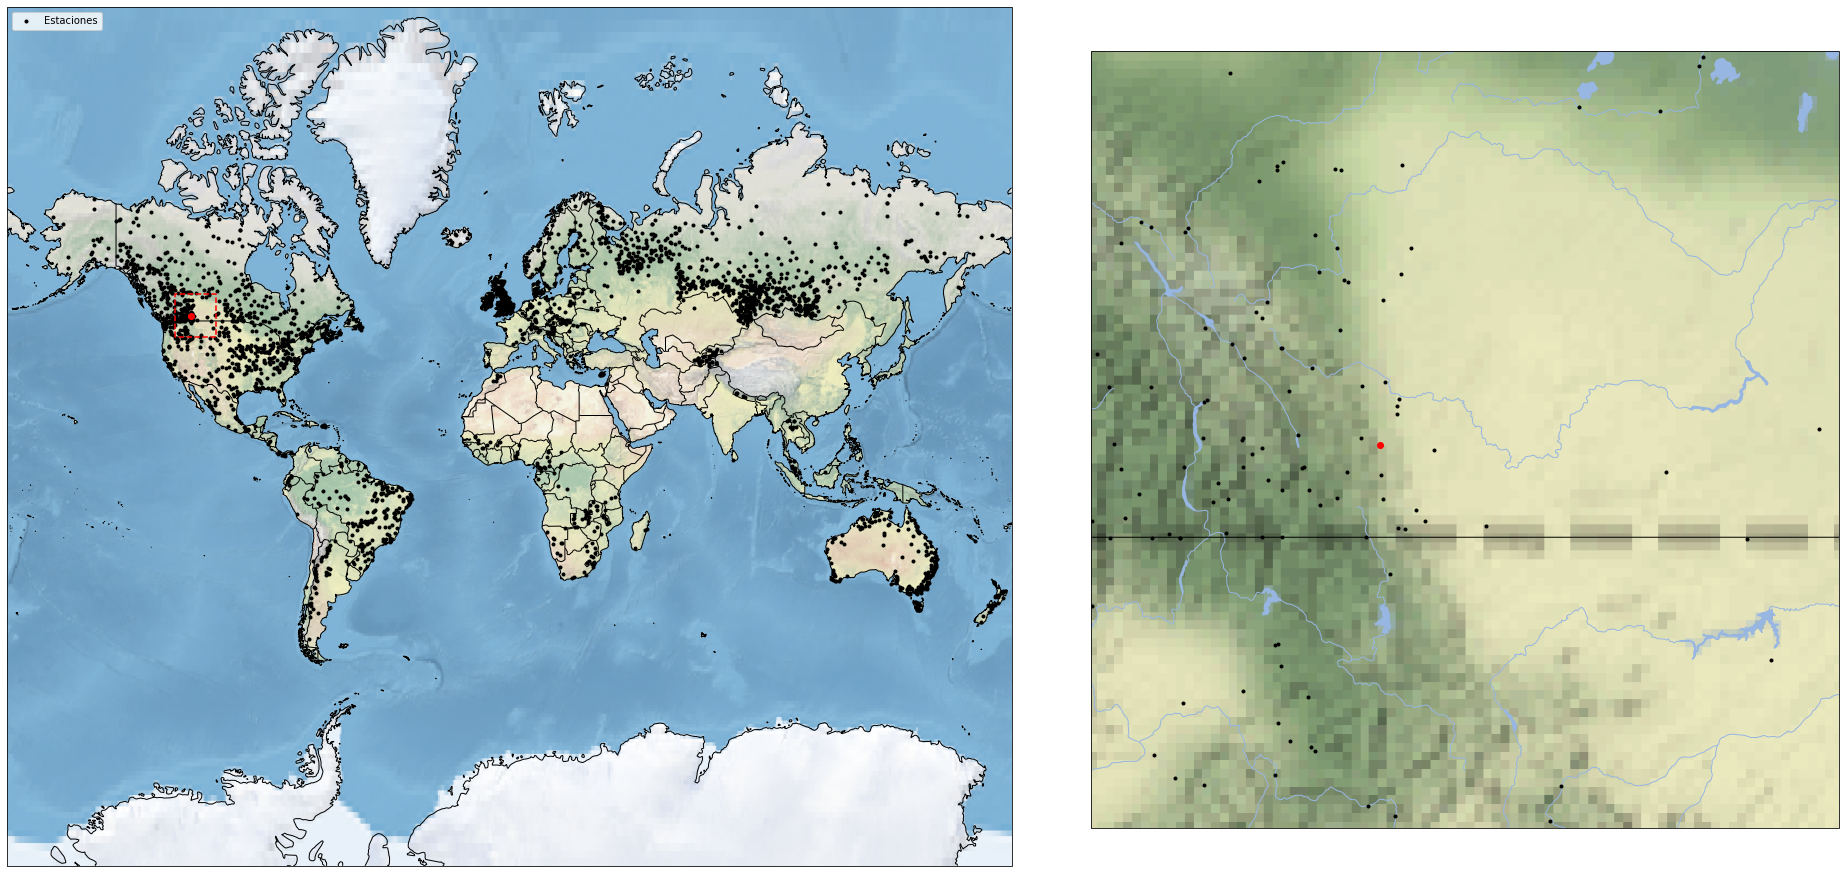

In [77]:
fig = plt.figure(figsize=(18,18))
ista = 1500 #Estación seleccionada al azar, al parecer: Provincia de Alberta en Canadá.
ax1 = fig.add_subplot(111,projection=ccrs.Mercator())  #Proyección Mercator
ax1.coastlines('50m')
ax1.stock_img()
ax1.plot(lon,lat,'k.',label='Estaciones',transform=ccrs.PlateCarree())
ax1.legend(loc='upper left')
ax1.plot([-120, -120, -105, -105, -120], [45, 55, 55, 45, 45],color='r',
         linestyle='--',transform=ccrs.PlateCarree())  #Con esto graficamos en la figura el cuadrado del zoom.
ax1.add_feature(cfeature.BORDERS)
ax1.plot(lon[ista],lat[ista],'ro',transform=ccrs.PlateCarree())



#Región 2:

reg2= [ -120, -105, 45, 55]
ax2 = fig.add_subplot(121,projection=ccrs.Mercator())
ax2.set_extent(reg2)
ax2.coastlines('10m')
ax2.add_image(tiler, 3)
ax2.plot(lon,lat,'k.',transform=ccrs.PlateCarree())
ax2.plot(lon[ista],lat[ista],'ro',transform=ccrs.PlateCarree())

#Posición de la figura 2 en la 1:
box = ax2.get_position()          
box.x0 = 0.2
box.x1 = 2.3
box.y0 = 0.2
box.y1 = 0.8 
#Add de configuraciones para más información:
ax2.set_position(box)
ax2.add_feature(cfeature.RIVERS)
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.OCEAN)
ax2.add_feature(cfeature.LAKES)
ax2.add_feature(cfeature.BORDERS)
plt.show()

##**SEGUNDA PARTE**

##**MAPA CON LAS ESTACIONES**

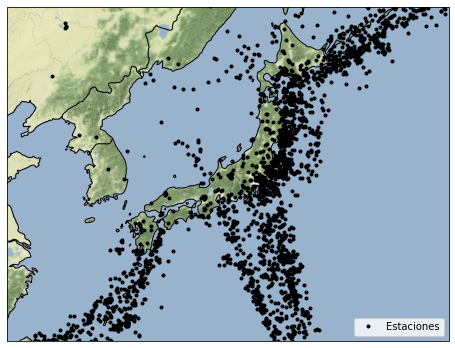

In [78]:
import matplotlib.colors as cm #Cargar las escalas de colores
import matplotlib.pyplot as plt
import numpy as np
# lectura del archivo
fname = 'eq_japan.csv'
data = pd.read_csv(fname, sep=',')
lat = data.iloc[:,1].to_numpy()
lon = data.iloc[:,2].to_numpy()
depth = data.iloc[:,3].to_numpy()
mag = data.iloc[:,4].to_numpy()



# descargar topografía y fronteras
tiler = cio.Stamen('terrain-background')
#Bajar el terrain-background, imágenes de topografía
#Con cierta resolución. La información del terreno
#El tiler va a guardar la información. No se ha hecho nada grave
#Ir por poca resolución hasta una satisfactoria que uno quiera hacer
#tiler son mismas imágenes pero distintas resoluciones


proj = ccrs.Mercator()
fig = plt.figure(figsize=(17.4,8))
ax  = fig.add_subplot(121,projection=proj)
ax.set_extent([120, 155, 25, 45])


# Adicionar topografía
ax.add_image(tiler, 6) #Con resolución 
ax.add_feature(cfeature.BORDERS)
ax.coastlines()
#Éste comando pone las estaciones:
ax.plot(lon,lat,'k.',label='Estaciones',transform=ccrs.Geodetic()) 
ax.legend()
plt.show()

#**MAPA DE MAGNITUD EN ESCALA DE RICHTER**

Text(0.5, 1.0, 'Magnitud en las estaciones de Japón')

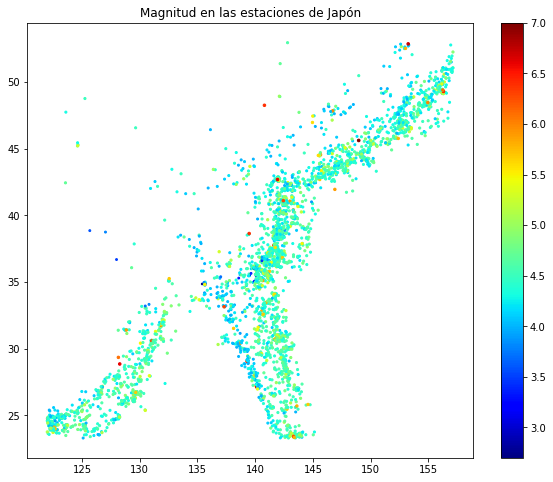

In [79]:
#EN VERTICAL ESTACIONES VS MAGNITUD:
fig, (ax1) = plt.subplots(1, 1, figsize=(10,8))
im1 = ax1.scatter(lon,lat,mag,c=mag, #La escala de colores logarítmicas
                  cmap='jet')
plt.colorbar(im1,ax=ax1)
ax1.set_title('Magnitud en las estaciones de Japón')

##**MAPA DE PROFUNDIDAD DE LAS ESTACIONES**

Text(0.5, 1.0, 'Profundidad en (m) en las estaciones de Japón')

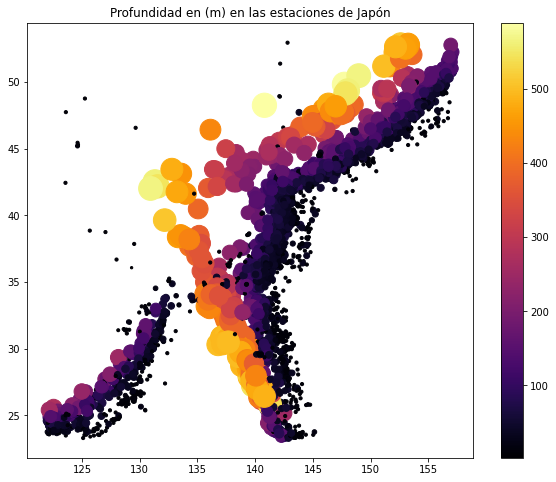

In [80]:
#EN VERTICAL ESTACIONES VS MAGNITUD:
fig, (ax1) = plt.subplots(1, 1, figsize=(10,8))
im1 = ax1.scatter(lon,lat,depth,c=depth, #La escala de colores logarítmicas
                  cmap='inferno')
plt.colorbar(im1,ax=ax1)
ax1.set_title('Profundidad en (m) en las estaciones de Japón')